#          *Data Analyst jobs EDA & visualization*

# About Dataset

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.


# Import Libraries and dataset

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')

# Lets explore the data

In [4]:
data.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


**Data includes job title , salary estimation , job description , rating ,company name , location and many more ...**

# Data cleaning 

### Remove the unnamed column

In [5]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

### Check for missing values

In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [7]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Company Name,1,0.0


In [8]:
data['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [9]:
data['Competitors'].value_counts()

-1                                              1732
Adecco, Manpower                                  14
Robert Half, Insight Global                       14
Google, Microsoft, Samsung Electronics            10
TEKsystems, Insight Global, Accenture             10
                                                ... 
Avnet, Ingram Micro, Tech Data                     1
C.H. Robinson, Transplace                          1
Salesforce, Oracle, Microsoft                      1
NEXTGEN GLOBAL RESOURCES, Wavsys, TEKsystems       1
Procter & Gamble, Nestlé, Johnson & Johnson        1
Name: Competitors, Length: 291, dtype: int64

In [10]:
data['Rating'].value_counts()[:5]

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
Name: Rating, dtype: int64

As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

Replace -1 or -1.0 or '-1' to NaN

In [11]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [12]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Easy Apply,2173,96.4
Competitors,1732,76.9
Founded,660,29.3
Industry,353,15.7
Sector,353,15.7
Rating,272,12.1
Headquarters,172,7.6
Size,163,7.2
Type of ownership,163,7.2
Revenue,163,7.2


Now you can see there are lots of missing values in the dataset. 'Easy Apply' and 'Competitors' has maximum number of missing values (> 50%)

Most companies has null values in easy apply because they are not hiring .

In [13]:
data['Company Name'],_=data['Company Name'].str.split('\n', 1).str

In [14]:
data['Job Title']

0       Data Analyst, Center on Immigration and Justic...
1                                    Quality Data Analyst
2       Senior Data Analyst, Insights & Analytics Team...
3                                            Data Analyst
4                                  Reporting Data Analyst
                              ...                        
2248    RQS - IHHA - 201900004460 -1q Data Security An...
2249                Senior Data Analyst (Corporate Audit)
2250    Technical Business Analyst (SQL, Data analytic...
2251                  Data Analyst 3, Customer Experience
2252                          Senior Quality Data Analyst
Name: Job Title, Length: 2253, dtype: object

In [15]:
data['Job Title'],data['Department']=data['Job Title'].str.split(',', 1).str

In [16]:
data['Job Title'].head()

0              Data Analyst
1      Quality Data Analyst
2       Senior Data Analyst
3              Data Analyst
4    Reporting Data Analyst
Name: Job Title, dtype: object

In [17]:
data['Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2253, dtype: object

In [18]:
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

#### Split salary into two columns min salary and max salary.

In [19]:
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str


In [20]:
data['Min_Salary']

0       $37K
1       $37K
2       $37K
3       $37K
4       $37K
        ... 
2248    $78K
2249    $78K
2250    $78K
2251    $78K
2252    $78K
Name: Min_Salary, Length: 2253, dtype: object

In [21]:
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [22]:
data.drop(['Salary Estimate'],axis=1,inplace=True)

In [23]:
data

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Min_Salary,Max_Salary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,NaN,37,66
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations],37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,NaN,78,104
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,NaN,78,104
2250,Technical Business Analyst (SQL,"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data analytics, ETL)",78,104
2251,Data Analyst 3,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,Customer Experience,78,104


# Current openings 

In [24]:
data['Easy Apply']

0       True
1        NaN
2        NaN
3        NaN
4       True
        ... 
2248     NaN
2249     NaN
2250     NaN
2251     NaN
2252     NaN
Name: Easy Apply, Length: 2253, dtype: object

In [25]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [26]:
data['Easy Apply']

0        True
1       False
2       False
3       False
4        True
        ...  
2248    False
2249    False
2250    False
2251    False
2252    False
Name: Easy Apply, Length: 2253, dtype: bool

In [27]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

In [28]:
company_opening_df

,Company Name,Easy Apply
3,Apex Systems,10
1,22nd Century Technologies,5
8,Chime,3
46,Signify Health,3
0,22nd Century Staffing,2
50,Tempus Labs,2
53,Undertone,2
5,BOLD,2
36,Omada Health,1
35,OSI Engineering,1


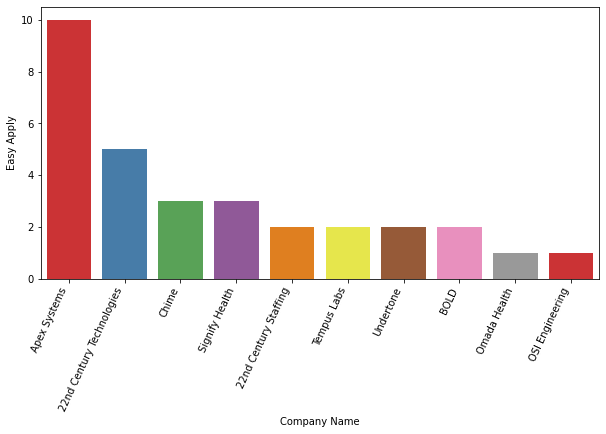

In [29]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 

)

**These are the top 10 companies hiring for Data analyst roles**

# Salary Distribution of Data Analyst

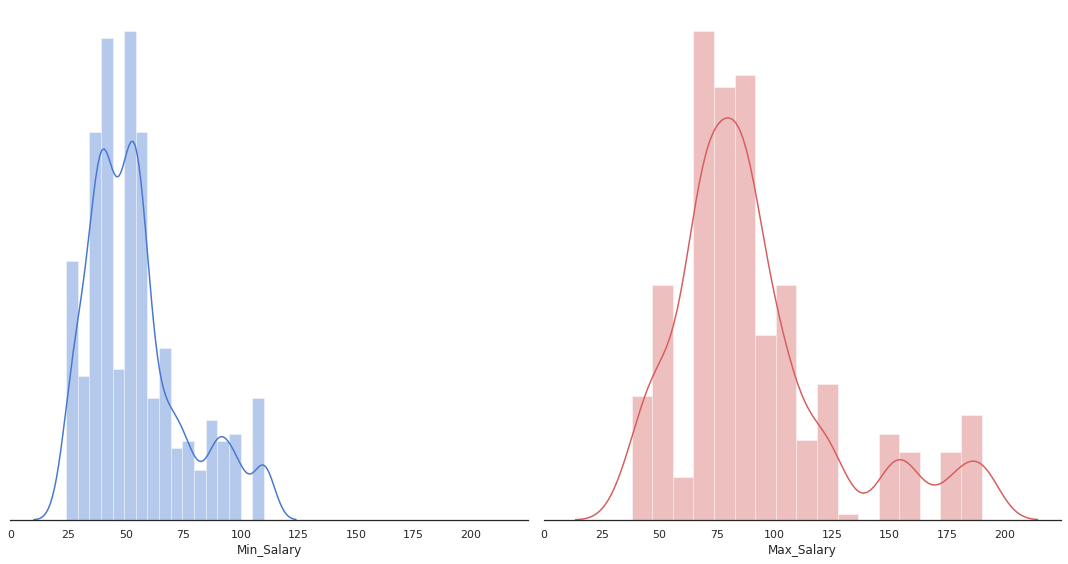

In [61]:
data_analyst = data[data['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)  # to remove the left spine

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])


sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# Top 20 cities with their minimum and maximum salaries 

In [62]:
df=data.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [64]:

fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()

# Top 20 Roles with their minimum and maximum salaries

In [66]:
df=data.groupby('Job Title')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [68]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 Roles with their minimum and maximum salaries',barmode='stack')

fig.show()

# Size of Employees Vs No of Companies

In [81]:
df=data['Size'].value_counts()

In [82]:
df=pd.DataFrame(df)
df['employee_size']=df.index
df

,Size,employee_size
51 to 200 employees,421,51 to 200 employees
10000+ employees,375,10000+ employees
1001 to 5000 employees,348,1001 to 5000 employees
1 to 50 employees,347,1 to 50 employees
201 to 500 employees,249,201 to 500 employees
501 to 1000 employees,211,501 to 1000 employees
5001 to 10000 employees,97,5001 to 10000 employees
Unknown,42,Unknown


In [84]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,Size,employee_size
0,421,51 to 200 employees
1,375,10000+ employees
2,348,1001 to 5000 employees
3,347,1 to 50 employees
4,249,201 to 500 employees
5,211,501 to 1000 employees
6,97,5001 to 10000 employees
7,42,Unknown


In [85]:
df=df.rename(columns={"Size": "No_of_companies"})

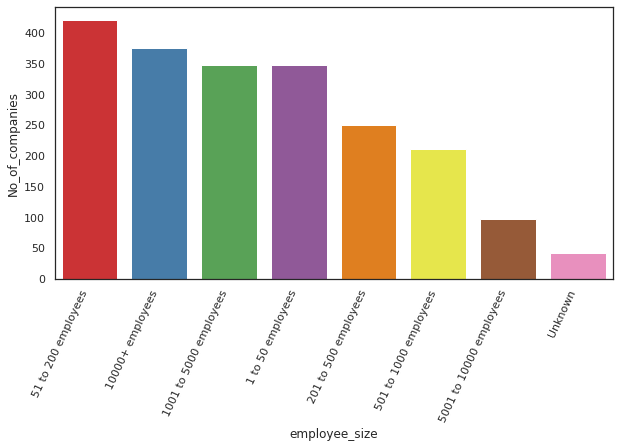

In [86]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='employee_size',
    y='No_of_companies',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

**maximum companies having size 1-200 or 5000**

# Revenue of different sectors

In [93]:
data['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [94]:
data['Revenue'][0]

'$100 to $500 million (USD)'

In [102]:
maxRev = data['Revenue'][0].replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
maxRev[0]
revenue = float(maxRev[0].replace('Less than','').strip())
revenue

100.0

In [103]:

def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue
        

In [104]:
data['Max_revenue']=data['Revenue'].apply(lambda x: filter_revenue(x))

In [106]:
df=data.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [107]:
df.reset_index(inplace=True)

In [108]:
df

,Sector,Max_revenue
0,Insurance,5465.196078
1,Mining & Metals,5000.000000
2,Aerospace & Defense,4884.090909
3,Telecommunications,4778.181818
4,Finance,4653.881657
5,Retail,4447.394737
6,Manufacturing,4382.625000
7,Media,3837.880952
8,Transportation & Logistics,3080.000000
9,Biotech & Pharmaceuticals,2835.636364


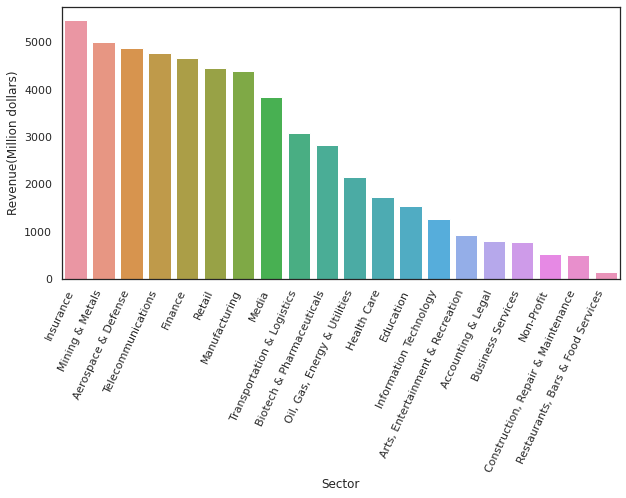

In [109]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Sector',
    y='Max_revenue'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")


As you can see from the graph **highest revenue** is from **Art,Entertainment and recreation**

# Revenue of different Industries

In [110]:
df=data.groupby('Industry')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [111]:
df.reset_index(inplace=True)

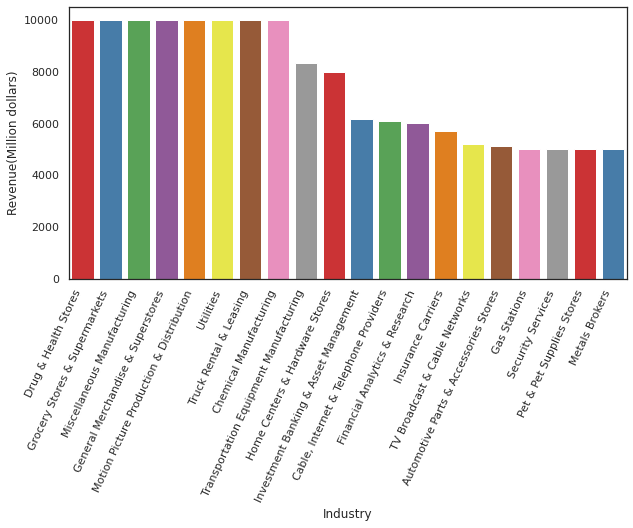

In [112]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Industry',
    y='Max_revenue',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")

# Ratings 

In [123]:
count=data.groupby('Rating')['Company Name'].count()

In [133]:
df=pd.DataFrame(count).rename(columns={'Company Name': 'Count'}).reset_index().sort_values('Rating',ascending=False).head(20)

In [130]:
df

,Rating,Count
35,5.0,131
34,4.9,17
33,4.8,29
32,4.7,23
31,4.6,46
30,4.5,47
29,4.4,46
28,4.3,55
27,4.2,47
26,4.1,119


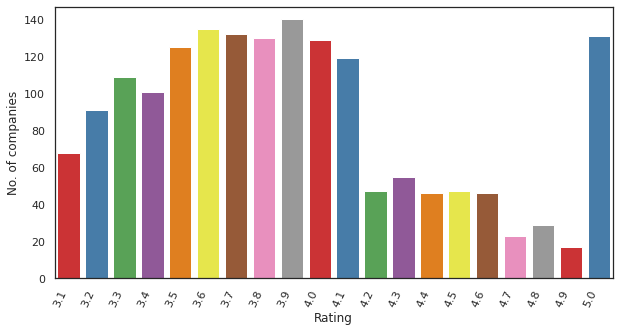

In [134]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Rating',
    y='Count',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("No. of companies")

# Jobs with Openings

In [139]:
df=pd.DataFrame(data[data['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})

In [141]:
df=df.reset_index().rename(columns={'index':'Job Title'})

In [143]:
df=df.head(10)

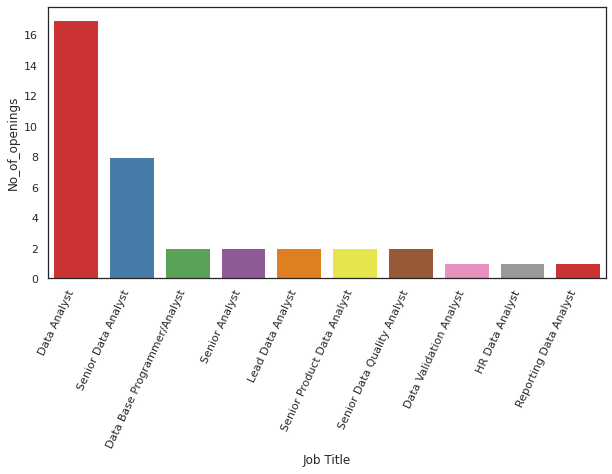

In [144]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Job Title',
    y='No_of_openings',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
